In [1]:
import matplotlib.pyplot as plt

from src.genetic.arbitrage import Population, CrossOverEnum, Arbitrage
import numpy as np
import hyperopt 
from hyperopt.fmin import fmin

from src.util import ExportadorDeGraficos
from itertools import product
from hyperopt import fmin, tpe, hp



In [2]:
arbitrages = []
arbitrages.append(Arbitrage("a86e2d9332c3ae6995a042ed4b95fe2b", 59664, 59631, "UNIBET_EU", "ONEXBET", 2.0, 2.02, 0.49)) 
arbitrages.append(Arbitrage("a86e2d9332c3ae6995a042ed4b95fe2b", 59664, 59655, "UNIBET_EU", "PINNACLE", 2.0, 2.03, 0.73))
arbitrages.append(Arbitrage("45c50eab0a379bd74d9ad5879ee50595", 94745, 94783, "ONEXBET", "UNIBET_EU", 1.9, 2.12, 0.19))
arbitrages.append(Arbitrage("45c50eab0a379bd74d9ad5879ee50595", 94745, 94791, "ONEXBET", "MATCHBOOK", 1.9, 2.14, 0.63))
arbitrages.append(Arbitrage("ff03cc32e860ac5cd4c907381443986f", 94795, 94833, "ONEXBET", "UNIBET_EU", 2.12, 1.91, 0.47))
simulation = []


In [ ]:
# 1. Função de avaliação
def objective(params):
    print(params)
    n_individuals = params['n_individuals']
    n_generations = params['n_generations']
    mutation_rate = round(params['mutation_rate'], 2)
    crossover_strategy = params['crossover_strategy']
    # print(f'n_individuals: {n_individuals}  n_generations: {n_generations}  mutation_rate: {mutation_rate}')
    nsga2 = Population(arbitrages, budget=100, n_individuals=n_individuals, crossover_strategy=crossover_strategy, mutation_rate=mutation_rate, n_generations=n_generations,)
    simulation.append(nsga2)
    hypervolume, hypervolume_medium = nsga2.get_hypervolume()
    print(f'n_individuals: {n_individuals}  n_generations: {n_generations}  mutation_rate: {mutation_rate}  value: {hypervolume_medium}')
    return -hypervolume_medium  # Objetivo é maximizar

In [ ]:
# 2. Espaço de busca
space_n_individuals = np.arange(50, 100, 50)
space_n_generations = np.arange(100, 500, 100)
space_crossover_strategy = [CrossOverEnum.UNIFORM_CROSSOVER_ONE_INDIVIDUAL, CrossOverEnum.ONE_POINT_CROSSOVER, CrossOverEnum.UNIFORM_CROSSOVER]
space = {
    'n_individuals': hp.choice('n_individuals', space_n_individuals),
    'n_generations': hp.choice('n_generations', space_n_generations),
    'mutation_rate': hp.uniform('mutation_rate', 0.01, 0.1),
    'crossover_strategy': hp.choice('crossover_strategy', space_crossover_strategy) 
}

# 3. Configurar um estudo Hyperopt
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=12, verbose=True)

print(best)

# 4. Recuperar os melhores parâmetros
best_n_individuals = space_n_individuals[best['n_individuals']]
best_n_generations = space_n_generations[best['n_generations']]
best_n_crossover = space_crossover_strategy[best['crossover_strategy']]
best_mutation_rate = best['mutation_rate']

export = ExportadorDeGraficos()
export.grid_hypervolume(simulation)

# print("Melhores parâmetros encontrados:")
# print("Número de Indivíduos:", best_n_individuals)
# print("Número de Gerações:", best_n_generations)
# print("Taxa de Mutação:", best_mutation_rate)
# print("Estratégia de Cruzamento:", best_n_crossover)

In [ ]:
from itertools import product

# 1. Função de avaliação
def objective(params):
    
    n_individuals = params[0]
    n_generations = params[1]
    mutation_rate = params[2]
    crossover_strategy = params[3]
    
    nsga2 = Population(arbitrages, budget=100, n_individuals=n_individuals, crossover_strategy=crossover_strategy, mutation_rate=mutation_rate, n_generations=n_generations,)
    simulation.append(nsga2)
    hypervolume, hypervolume_medium = nsga2.get_hypervolume()
    print(f'n_individuals: {n_individuals}  n_generations: {n_generations}  mutation_rate: {mutation_rate}  value: {hypervolume_medium}')
    return -hypervolume_medium  # Objetivo é maximizar

simulation = []
space_n_individuals = [20, 50, 100]
space_n_generations = [50, 100, 250, 300, 350, 400]
space_mutation = [0.05]
space_crossover_strategy = [CrossOverEnum.UNIFORM_CROSSOVER_ONE_INDIVIDUAL]

parameter_combinations = list(product(space_n_individuals, space_n_generations, space_mutation, space_crossover_strategy))
len(parameter_combinations)

best = fmin(fn=objective, space=hp.choice('params', parameter_combinations), algo=tpe.suggest, max_evals=len(parameter_combinations))
best_params = parameter_combinations[best['params']]
print(best_params)

export = ExportadorDeGraficos()
export.grid_hypervolume(simulation)

In [6]:
from itertools import product

# 1. Função de avaliação
def objective(params):
    
    n_individuals = params[0]
    n_generations = params[1]
    mutation_rate = params[2]
    crossover_strategy = params[3]
    
    nsga2 = Population(arbitrages, budget=100, n_individuals=n_individuals, crossover_strategy=crossover_strategy, mutation_rate=mutation_rate, n_generations=n_generations,)
    simulation.append(nsga2)
    hypervolume, hypervolume_medium = nsga2.get_hypervolume()
    print(f'n_individuals: {n_individuals}  n_generations: {n_generations}  mutation_rate: {mutation_rate}  value: {hypervolume_medium}')
    return -hypervolume_medium  # Objetivo é maximizar

simulation = []
space_n_individuals = [20, 40]
space_n_generations = [150, 350]
space_mutation = [0.05]
space_crossover_strategy = [CrossOverEnum.UNIFORM_CROSSOVER_ONE_INDIVIDUAL, CrossOverEnum.ONE_POINT_CROSSOVER, CrossOverEnum.UNIFORM_CROSSOVER]


parameter_combinations = list(product(space_n_individuals, space_n_generations, space_mutation, space_crossover_strategy))

len(parameter_combinations)

# Executar a otimização dos parâmetros de forma sequencial
best_params = None
best_hypervolume = None
for params in parameter_combinations:
    result = objective(params)
    if best_hypervolume is None or result < best_hypervolume:
        best_params = params
        best_hypervolume = result

print(best_params)


export = ExportadorDeGraficos()
export.grid_hypervolume(simulation, best_params)

n_individuals: 20  n_generations: 150  mutation_rate: 0.05  value: 0.8299622144927089
n_individuals: 20  n_generations: 150  mutation_rate: 0.05  value: 0.7489558070591122
n_individuals: 20  n_generations: 150  mutation_rate: 0.05  value: 0.2653815102254961
n_individuals: 20  n_generations: 350  mutation_rate: 0.05  value: 0.9395458674002674
n_individuals: 20  n_generations: 350  mutation_rate: 0.05  value: 0.6511447590537985
n_individuals: 20  n_generations: 350  mutation_rate: 0.05  value: 0.33355704731412744
n_individuals: 40  n_generations: 150  mutation_rate: 0.05  value: 0.9573440675281589
n_individuals: 40  n_generations: 150  mutation_rate: 0.05  value: 0.9662942558276959
n_individuals: 40  n_generations: 150  mutation_rate: 0.05  value: 0.7292018660933615
n_individuals: 40  n_generations: 350  mutation_rate: 0.05  value: 0.9596466554456387
n_individuals: 40  n_generations: 350  mutation_rate: 0.05  value: 0.9018935722271462
n_individuals: 40  n_generations: 350  mutation_rate:

In [ ]:
import pygmo as pg
from matplotlib import pyplot as plt

reference_point = [1.1, 1.1]

n_rows = int(np.ceil(np.sqrt(len(simulation))))
n_columns = int(np.ceil(len(simulation) / n_rows))

count = 1
plt.figure(figsize=(16, 16))
for population in simulation:
    x_values = [x for x, _ in population.pareto_history_front]
    y_values_reversed = [1 / pg.hypervolume([individual.fitness_normalized for individual in y]).compute(reference_point) for _, y in population.pareto_history_front]
    
    max_value = max(y_values_reversed)
    y_values_reversed = [i / max_value for i in y_values_reversed]
    
    title = f'[P]: {population.n_individuals} [G]: {population.n_generations} [M]: {population.mutation_rate} \n{population.crossover_strategy.name}'
    plt.subplot(n_rows, n_columns, count)
    plt.plot(x_values, y_values_reversed)
    plt.title(title)
    
    count += 1

# Adicionar espaçamento entre os subgráficos
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

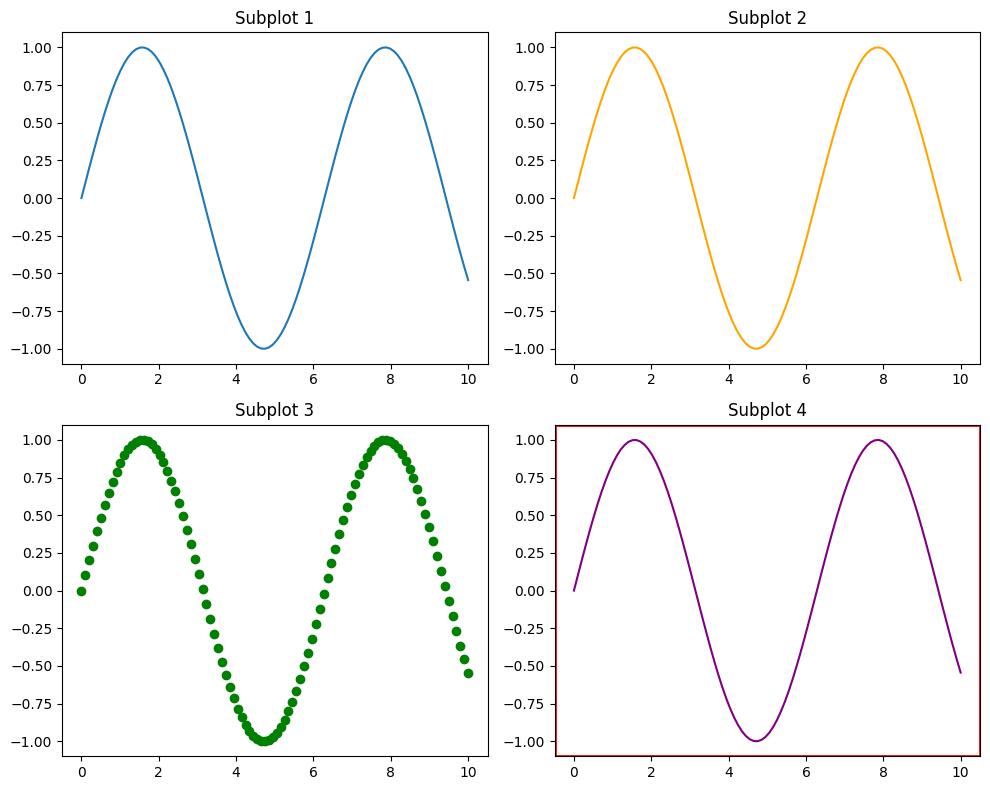

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Dados de exemplo
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Crie uma figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Subplot 1 (superior esquerdo)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Subplot 1')

# Subplot 2 (superior direito)
axs[0, 1].plot(x, y, color='orange')
axs[0, 1].set_title('Subplot 2')

# Subplot 3 (inferior esquerdo)
axs[1, 0].scatter(x, y, marker='o', color='green')
axs[1, 0].set_title('Subplot 3')

# Subplot 4 (inferior direito) com borda vermelha
axs[1, 1].plot(x, y, color='purple')
axs[1, 1].set_title('Subplot 4')

# Adicione uma borda vermelha ao redor do Subplot 4
border = patches.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='red', facecolor='none', transform=axs[1, 1].transAxes)
axs[1, 1].add_patch(border)

# Ajuste os espaçamentos entre os subplots para melhor visualização
plt.tight_layout()

plt.show()


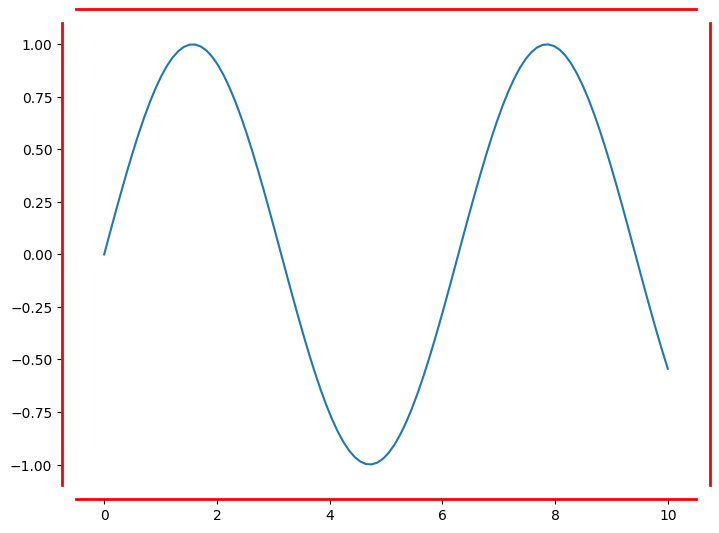

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Crie uma figura com um subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plote os dados
ax.plot(x, y)

# Defina a cor vermelha para os limites dos eixos
ax.spines['top'].set_color('red')
ax.spines['bottom'].set_color('red')
ax.spines['left'].set_color('red')
ax.spines['right'].set_color('red')

# Defina a espessura da linha dos limites dos eixos
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

# Ajuste os limites dos eixos
ax.spines['top'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['left'].set_position(('outward', 10))
ax.spines['right'].set_position(('outward', 10))

plt.show()


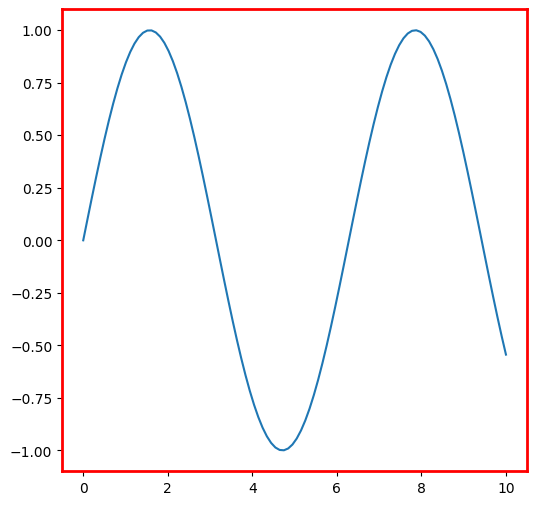

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Crie uma figura com um subplot
fig, ax = plt.subplots(figsize=(6, 6))

# Dados de exemplo
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plote alguns dados no subplot
ax.plot(x, y)

# Adicione um contorno vermelho ao redor do subplot
for spine in ax.spines.values():
    spine.set_edgecolor('red')
    spine.set_linewidth(2)

plt.show()
